## Group Project - Task 2: Feature Selection

In [122]:
import gzip
import csv
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/Users/ethanbensadoun/Desktop/LSE/ST443 Machine Learning and Data Mining/project/data-2.csv.gz"
mice_data = pd.read_csv(file_path, compression='gzip')
print(mice_data)

     label  unit_0000_bin_0  unit_0001_bin_0  unit_0002_bin_0  \
0        1                1                0                0   
1        0                4                8                0   
2        1                2                5                0   
3        0                0                8                0   
4        0                0                2                1   
..     ...              ...              ...              ...   
678      0                0                2                0   
679      0                0                0                0   
680      0                0                0                0   
681      0                0                0                0   
682      0                0                0                0   

     unit_0003_bin_0  unit_0004_bin_0  unit_0005_bin_0  unit_0006_bin_0  \
0                  2                6                0                0   
1                  3                9               13               

In [130]:
df = mice_data
print(df.shape)

(683, 11191)


- We can see that the output contains the p = 11190 features for n = 683 trials. (Note that the extra column accounts for indexing).
- This means that the data was properly loaded into the notebook.

In [53]:
df.head()

,label,unit_0000_bin_0,unit_0001_bin_0,unit_0002_bin_0,unit_0003_bin_0,unit_0004_bin_0,unit_0005_bin_0,unit_0006_bin_0,unit_0007_bin_0,unit_0008_bin_0,...,unit_2228_bin_4,unit_2229_bin_4,unit_2230_bin_4,unit_2231_bin_4,unit_2232_bin_4,unit_2233_bin_4,unit_2234_bin_4,unit_2235_bin_4,unit_2236_bin_4,unit_2237_bin_4
0,1,1,0,0,2,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,8,0,3,9,13,6,3,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,5,0,2,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,8,0,0,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,1,3,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/ethanbensadoun/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/ethanbensadoun/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/ethanbensadoun/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='label', ylabel='label'>,
        <Axes: xlabel='unit_0000_bin_0', ylabel='label'>,
        <Axes: xlabel='unit_0001_bin_0', ylabel='label'>,
        <Axes: xlabel='unit_0002_bin_0', ylabel='label'>,
        <Axes: xlabel='unit_0003_bin_0', ylabel='label'>,
        <Axes: xlabel='unit_0004_bin_0', ylabel='label'>,
        <Axes: xlabel='unit_0005_bin_0', ylabel='label'>,
        <Axes: xlabel='unit_0006_bin_0', ylabel='label'>,
        <Axes: xlabel='unit_0007_bin_0', ylabel='label'>,
        <Axes: xlabel='unit_0008_bin_0', ylabel='label'>],
       [<Axes: xlabel='label', ylabel='unit_0000_bin_0'>,
        <Axes: xlabel='unit_0000_bin_0', ylabel='unit_0000_bin_0'>,
        <Axes: xlabel='unit_0001_bin_0', ylabel='unit_0000_bin_0'>,
        <Axes: xlabel='unit_0002_bin_0', ylabel='unit_0000_bin_0'>,
        <Axes: xlabel='unit_0003_bin_0', ylabel='unit_0000_bin_0'>,
        <Axes: xlabel='unit_0004_bin_0', ylabel='unit_0000_bin_0'>,
        <Axes: xlabel='unit_000

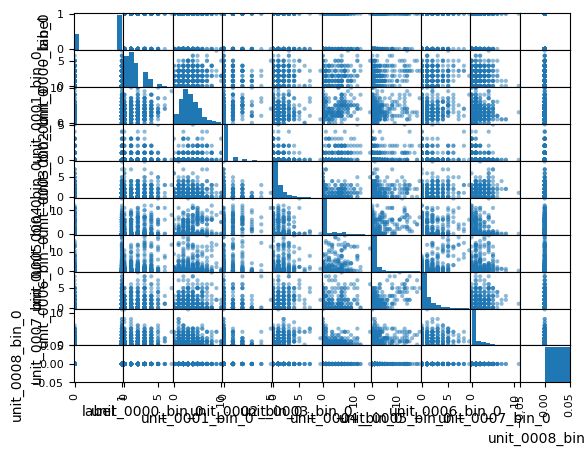

In [55]:
subset = df.iloc[:, :10]
pd.plotting.scatter_matrix(subset)

In [59]:
print(df['label'].value_counts())
# split data into two classes (binary); to confirm the number of labels with 0 and 1

label
1    475
0    208
Name: count, dtype: int64


In [61]:
means = df.drop(columns='label').mean(axis=1)
print(means)

0      0.424129
1      0.435925
2      0.473637
3      0.419482
4      0.392493
         ...   
678    0.284540
679    0.270241
680    0.236104
681    0.220733
682    0.218231
Length: 683, dtype: float64


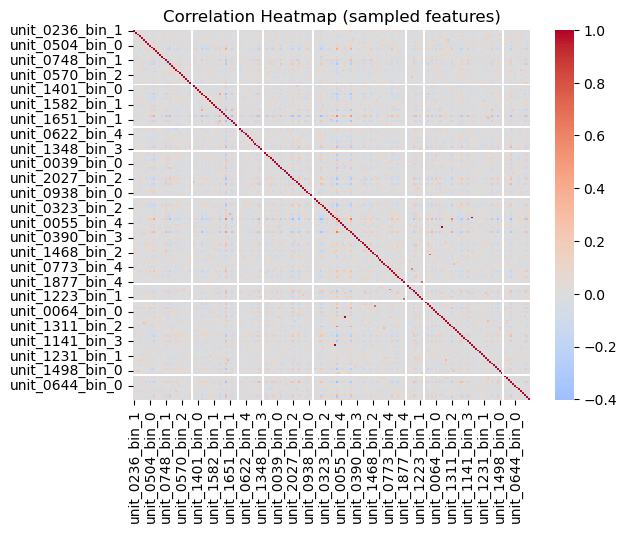

In [71]:
sampled = df.sample(n=200, axis=1)  # random 200 features
sns.heatmap(sampled.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (sampled features)")
plt.show()

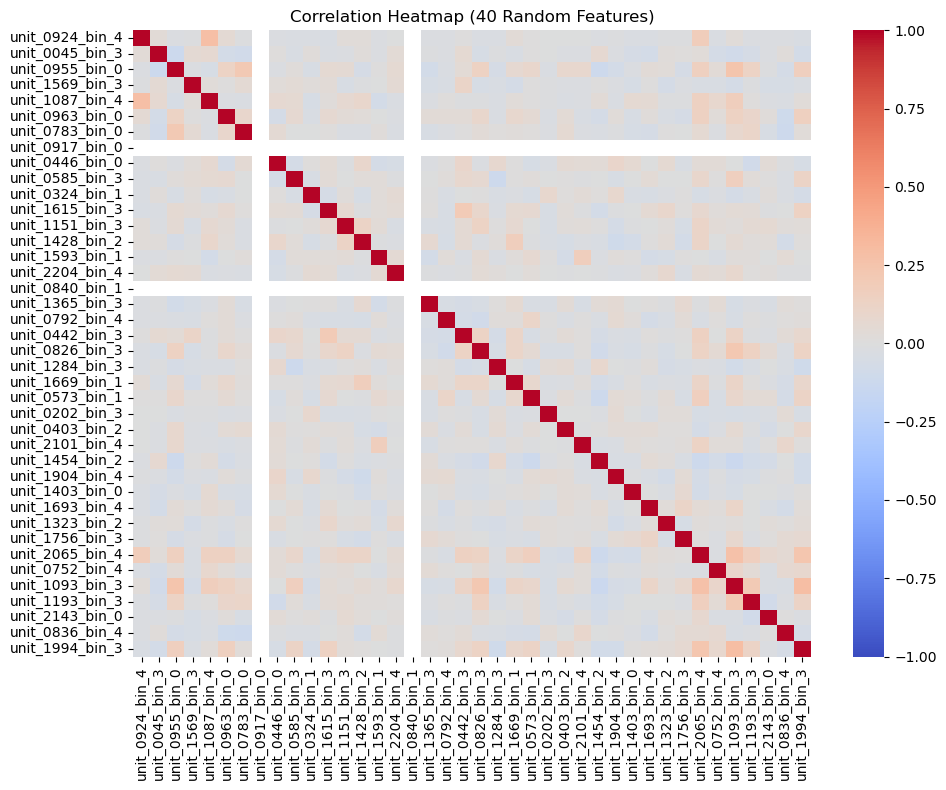

In [73]:
sampled = df.sample(n=40, axis=1, random_state=1)
corr = sampled.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap (40 Random Features)")
plt.tight_layout()
plt.show()


**Here is a correlation matrix**

- Each cell shows the Pearson correlation between two features (spike count features = neuron × time bin).

**The color scale:**
- Red = strong positive correlation (features tend to increase together).
- Blue = strong negative correlation (one increases, the other decreases).
- White/gray = near zero correlation (statistically independent).

**Interpretation:**
- The rest of the plot is mostly pale
- Off-diagonal values (comparisons between different neurons or bins) are very light.
- That means most pairwise correlations are close to 0 (weak relationships).

→ Spike count features are largely independent across neurons and time bins.

→ Each neuron’s activity contributes somewhat unique information.

**White Grid:**
- That randomness produces visual discontinuities because correlation patterns suddenly shift at arbitrary points — creating the illusion of sharp white “boundaries.”
- The white squares are not meaningful correlation clusters.
- They simply mark transitions between uncorrelated subsets of randomly ordered features.


**Example of how to describe it in your report**

A random subset of 40 spike-count features was examined to assess redundancy among neuron-time features.
The correlation heatmap (Figure X) shows minimal off-diagonal structure, with most correlations near zero and a few weakly positive or negative values.

This suggests that neurons respond relatively independently to the stimulus, and that high-dimensional feature representations are not dominated by strongly correlated subgroups.

Consequently, feature selection or dimensionality-reduction methods (e.g., PCA, LASSO) are likely appropriate and may efficiently capture the most informative components for classification.

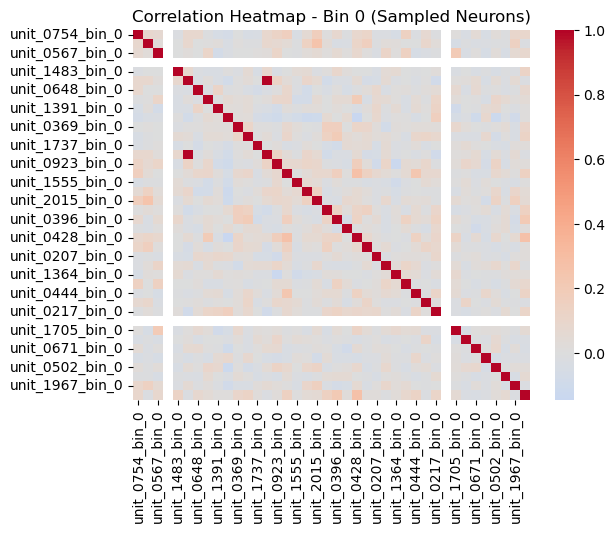

In [111]:
bin0 = df.filter(like='bin_0').sample(n=40, axis=1)
sns.heatmap(bin0.corr(), cmap='coolwarm', center=0)
plt.title("Correlation Heatmap - Bin 0 (Sampled Neurons)")
plt.show()

In [77]:
import re
import numpy as np
import pandas as pd

# Split wide columns -> tidy long table: (trial, unit, bin, count)
def to_long(df):
    feat_cols = [c for c in df.columns if c.startswith("unit_")]
    long = df[feat_cols].copy()
    long["trial_id"] = np.arange(len(df))
    long = long.melt(id_vars="trial_id", var_name="feature", value_name="count")
    long["unit"] = long["feature"].str.extract(r"unit_(\d+)_bin_\d+").astype(int)
    long["bin"]  = long["feature"].str.extract(r"bin_(\d+)").astype(int)
    return long.drop(columns="feature")

# Matrix (neurons × 5 bins) of means across trials
def population_mean_matrix(df):
    feat_cols = [c for c in df.columns if c.startswith("unit_")]
    # parse unit & bin
    parts = pd.Series(feat_cols).str.extract(r"(unit_(\d+))_bin_(\d+)")
    parts.columns = ["unit_tag","unit_idx","bin"]
    parts["unit_idx"] = parts["unit_idx"].astype(int)
    parts["bin"] = parts["bin"].astype(int)
    means = df[feat_cols].mean(0).to_numpy()  # mean over trials
    M = pd.DataFrame({"unit":parts["unit_idx"], "bin":parts["bin"], "mean":means})
    pivot = M.pivot(index="unit", columns="bin", values="mean").sort_index()
    return pivot.to_numpy(), pivot.index.to_numpy()  # (n_units, 5), unit ids

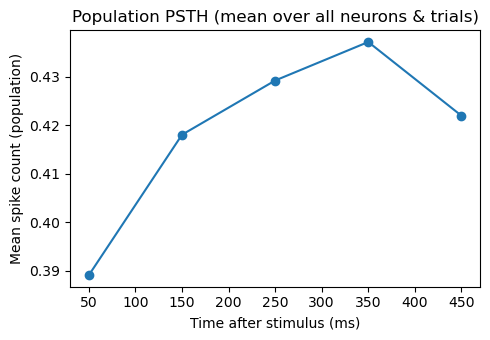

In [79]:
import matplotlib.pyplot as plt

bins_ms = np.arange(0, 501, 100)[:-1] + 50  # bin centers: 50,150,250,350,450
feat_cols = [c for c in df.columns if c.startswith("unit_")]

bin_means = []
for t in range(5):
    bin_means.append(df.filter(like=f"bin_{t}").values.mean())
bin_means = np.array(bin_means)

plt.figure(figsize=(5,3.5))
plt.plot(bins_ms, bin_means, marker="o")
plt.xlabel("Time after stimulus (ms)")
plt.ylabel("Mean spike count (population)")
plt.title("Population PSTH (mean over all neurons & trials)")
plt.tight_layout()
plt.show()

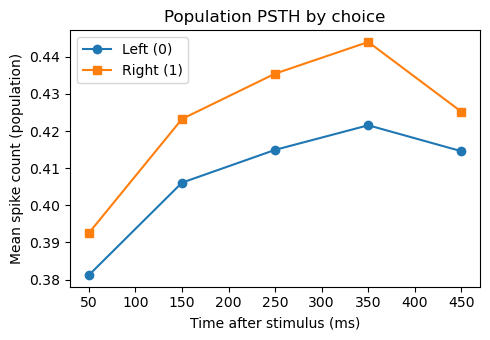

In [81]:
bins_ms = np.arange(0, 501, 100)[:-1] + 50

def psth_by_label(df, yval):
    out = []
    subset = df[df["label"]==yval]
    for t in range(5):
        out.append(subset.filter(like=f"bin_{t}").values.mean())
    return np.array(out)

left = psth_by_label(df, 0)
right = psth_by_label(df, 1)

plt.figure(figsize=(5,3.5))
plt.plot(bins_ms, left, marker="o", label="Left (0)")
plt.plot(bins_ms, right, marker="s", label="Right (1)")
plt.xlabel("Time after stimulus (ms)")
plt.ylabel("Mean spike count (population)")
plt.title("Population PSTH by choice")
plt.legend()
plt.tight_layout()
plt.show()

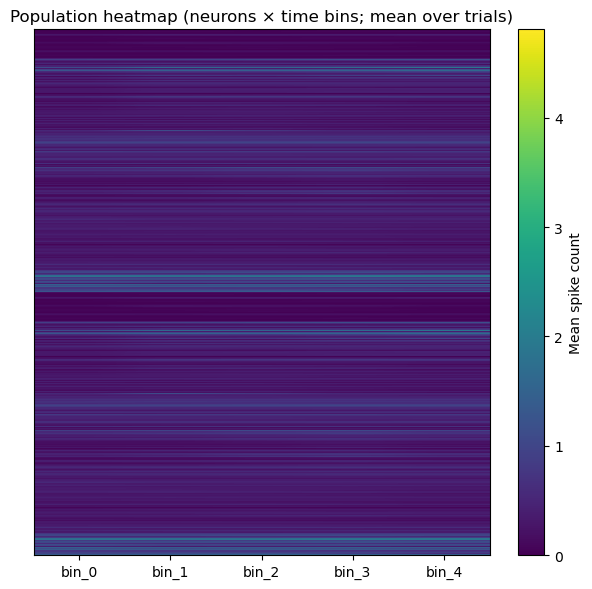

In [83]:
M, unit_ids = population_mean_matrix(df)   # shape: (n_neurons, 5)

plt.figure(figsize=(6,6))
plt.imshow(M, aspect="auto", origin="lower")
plt.colorbar(label="Mean spike count")
plt.yticks([])  # too many neurons to label; keep clean
plt.xticks(range(5), [f"bin_{t}" for t in range(5)])
plt.title("Population heatmap (neurons × time bins; mean over trials)")
plt.tight_layout()
plt.show()

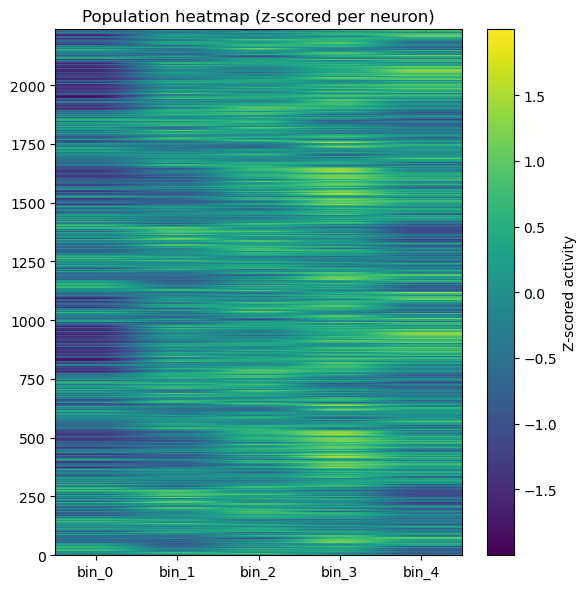

In [85]:
Mzs = (M - M.mean(axis=1, keepdims=True)) / (M.std(axis=1, keepdims=True) + 1e-9)
plt.figure(figsize=(6,6))
plt.imshow(Mzs, aspect="auto", origin="lower")
plt.colorbar(label="Z-scored activity")
plt.xticks(range(5), [f"bin_{t}" for t in range(5)])
plt.title("Population heatmap (z-scored per neuron)")
plt.tight_layout(); plt.show()

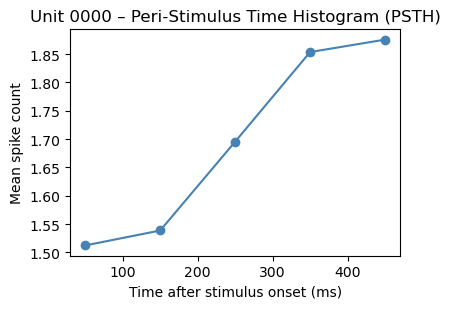

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Define the neuron ID you want to plot
unit_id = 0  # corresponds to unit_0000
cols = [f"unit_{unit_id:04d}_bin_{t}" for t in range(5)]

# Time-bin centers in ms (0–500 ms window, 5 bins)
bins_ms = np.arange(0, 501, 100)[:-1] + 50

# Compute mean spike count across all trials for this neuron
mean_psth = df[cols].mean(axis=0).to_numpy()

plt.figure(figsize=(4.2,3.2))
plt.plot(bins_ms, mean_psth, marker="o", color="steelblue")
plt.xlabel("Time after stimulus onset (ms)")
plt.ylabel("Mean spike count")
plt.title("Unit 0000 – Peri-Stimulus Time Histogram (PSTH)")
plt.tight_layout()
plt.show()

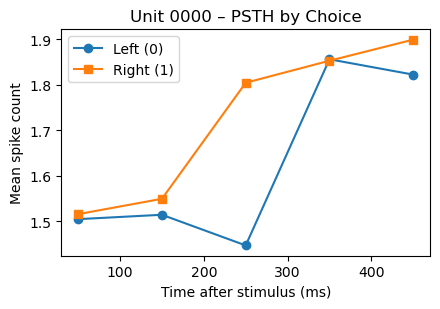

In [91]:
bins_ms = np.arange(0, 501, 100)[:-1] + 50

def neuron_psth(df, unit_id, label_val):
    cols = [f"unit_{unit_id:04d}_bin_{t}" for t in range(5)]
    subset = df[df["label"] == label_val]
    return subset[cols].mean(axis=0).to_numpy()

left = neuron_psth(df, 0, 0)
right = neuron_psth(df, 0, 1)

plt.figure(figsize=(4.5,3.2))
plt.plot(bins_ms, left, marker="o", label="Left (0)")
plt.plot(bins_ms, right, marker="s", label="Right (1)")
plt.xlabel("Time after stimulus (ms)")
plt.ylabel("Mean spike count")
plt.title("Unit 0000 – PSTH by Choice")
plt.legend()
plt.tight_layout()
plt.show()

- Each point represents the average spike count in a 100 ms window after stimulus onset.
- A rising curve ⇒ neuron fires more later in the 0–500 ms window.
- Divergence between the “Left” and “Right” lines ⇒ this neuron may encode decision information.

In [96]:
import re
import numpy as np
import pandas as pd

# discover available unit IDs from column names
feat_cols = [c for c in df.columns if c.startswith("unit_")]
units = sorted({int(re.search(r"unit_(\d+)_bin_\d+", c).group(1)) for c in feat_cols})

def unit_score(df, u):
    # stack that unit’s 5 bins -> (trials, 5)
    cols = [f"unit_{u:04d}_bin_{t}" for t in range(5) if f"unit_{u:04d}_bin_{t}" in df.columns]
    if len(cols) < 5:
        return -np.inf  # skip incomplete units
    A = df[cols].to_numpy()
    # score = mean variance across the 5 bins (variance over trials)
    return A.var(axis=0).mean()

scores = [(u, unit_score(df, u)) for u in units]
scores = [(u, s) for u, s in scores if np.isfinite(s)]
scores.sort(key=lambda x: x[1], reverse=True)

top_units = [u for u, _ in scores[:6]]  # take top 6 (or any N you like)
top_units[:6]

[955, 2074, 920, 2039, 4, 1123]

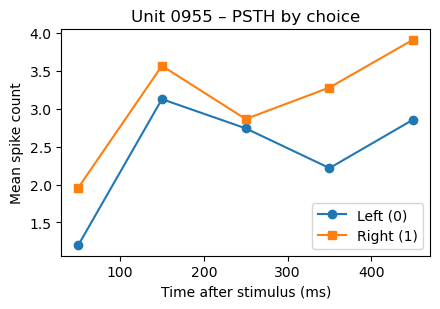

In [98]:
u = top_units[0]  # pick one
bins_ms = np.arange(0, 501, 100)[:-1] + 50

def neuron_psth(df, unit_id, label_val=None):
    cols = [f"unit_{unit_id:04d}_bin_{t}" for t in range(5)]
    sub = df if label_val is None else df[df["label"] == label_val]
    return sub[cols].mean(0).to_numpy()

import matplotlib.pyplot as plt
plt.figure(figsize=(4.5,3.2))
plt.plot(bins_ms, neuron_psth(df, u, 0), marker="o", label="Left (0)")
plt.plot(bins_ms, neuron_psth(df, u, 1), marker="s", label="Right (1)")
plt.xlabel("Time after stimulus (ms)")
plt.ylabel("Mean spike count")
plt.title(f"Unit {u:04d} – PSTH by choice")
plt.legend()
plt.tight_layout()
plt.show()

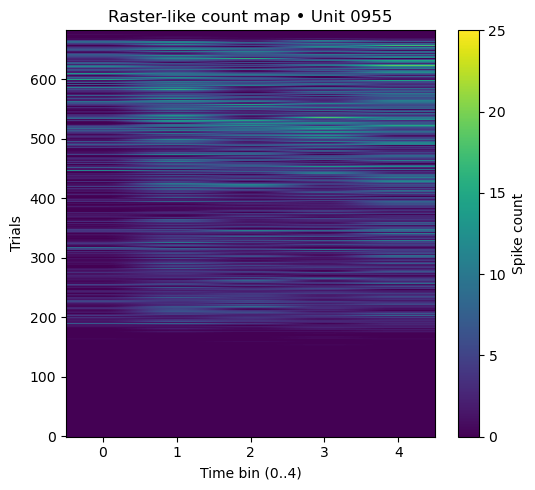

In [100]:
u = top_units[0]
cols = [f"unit_{u:04d}_bin_{t}" for t in range(5)]
A = df[cols].to_numpy()  # shape: (trials, 5)

plt.figure(figsize=(5.5,5))
plt.imshow(A, aspect="auto", origin="lower")
plt.colorbar(label="Spike count")
plt.xlabel("Time bin (0..4)")
plt.ylabel("Trials")
plt.title(f"Raster-like count map • Unit {u:04d}")
plt.tight_layout()
plt.show()

-  PSTH: shows the global time course (0–500 ms) after stimulus onset.

- Class-split PSTH: highlights any Left/Right divergence (temporal windows with discriminative signal).

- Heatmap (neurons × time): reveals which neurons peak early/late; z-scoring clarifies patterns.

- Single-neuron PSTHs: spotlight a few informative units (e.g., high-variance) to illustrate diversity.

- Raster-like maps: show per-trial variability for a neuron (even with binned counts).

In [138]:
# Dimensions
print(f"Data shape: {df.shape}")  # Should be (683, 11191)

# Check for missing values
print(f"Missing values: {df.isnull().sum().sum()}")

# Summary statistics
print("\nLabel distribution:")
print(df['label'].value_counts())
print("\nLabel proportions:")
print(df['label'].value_counts(normalize=True))

# Basic stats
print("\nFirst few rows:")
print(df.head())

Data shape: (683, 11191)
Missing values: 0

Label distribution:
label
1    475
0    208
Name: count, dtype: int64

Label proportions:
label
1    0.695461
0    0.304539
Name: proportion, dtype: float64

First few rows:
   label  unit_0000_bin_0  unit_0001_bin_0  unit_0002_bin_0  unit_0003_bin_0  \
0      1                1                0                0                2   
1      0                4                8                0                3   
2      1                2                5                0                2   
3      0                0                8                0                0   
4      0                0                2                1                3   

   unit_0004_bin_0  unit_0005_bin_0  unit_0006_bin_0  unit_0007_bin_0  \
0                6                0                0                1   
1                9               13                6                3   
2                7                1                0                0   
3        

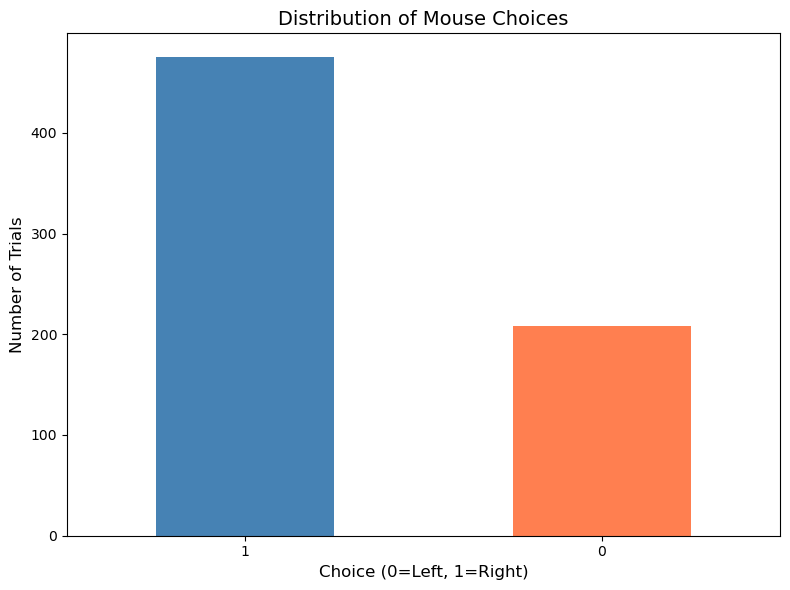

In [140]:
# Bar plot of labels
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['steelblue', 'coral'])
plt.title('Distribution of Mouse Choices', fontsize=14)
plt.xlabel('Choice (0=Left, 1=Right)', fontsize=12)
plt.ylabel('Number of Trials', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

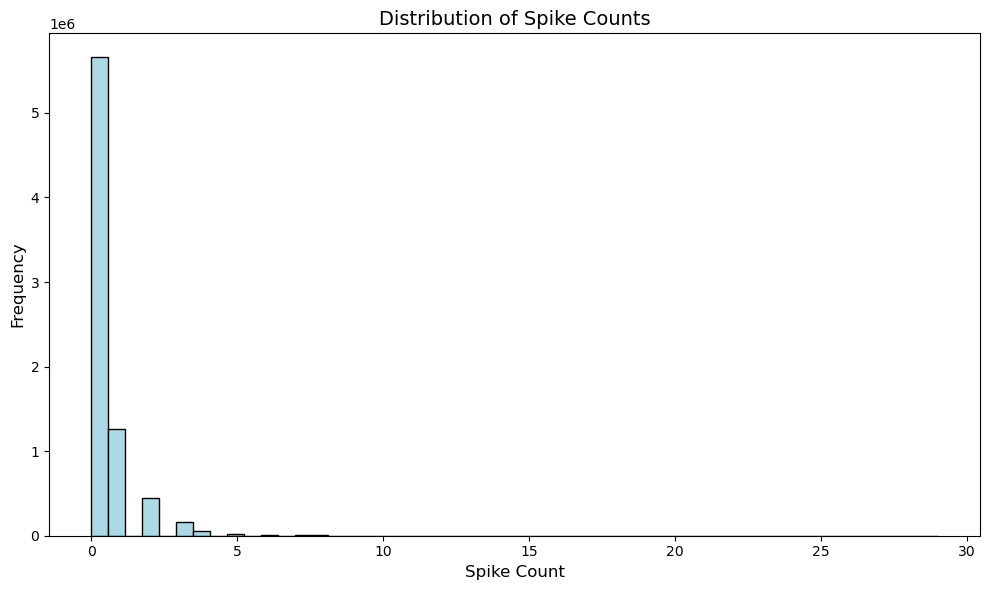


Spike count statistics:
Mean: 0.42
Median: 0.00
Std: 0.91
Min: 0
Max: 29

Percentage of zeros: 74.03%


In [142]:
# Overall distribution of spike counts across all features
spike_counts = df.iloc[:, 1:].values.flatten()  # Exclude label column

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(spike_counts, bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Spike Counts', fontsize=14)
plt.xlabel('Spike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Summary stats
print("\nSpike count statistics:")
print(f"Mean: {np.mean(spike_counts):.2f}")
print(f"Median: {np.median(spike_counts):.2f}")
print(f"Std: {np.std(spike_counts):.2f}")
print(f"Min: {np.min(spike_counts)}")
print(f"Max: {np.max(spike_counts)}")

# Sparsity
print(f"\nPercentage of zeros: {np.mean(spike_counts == 0) * 100:.2f}%")

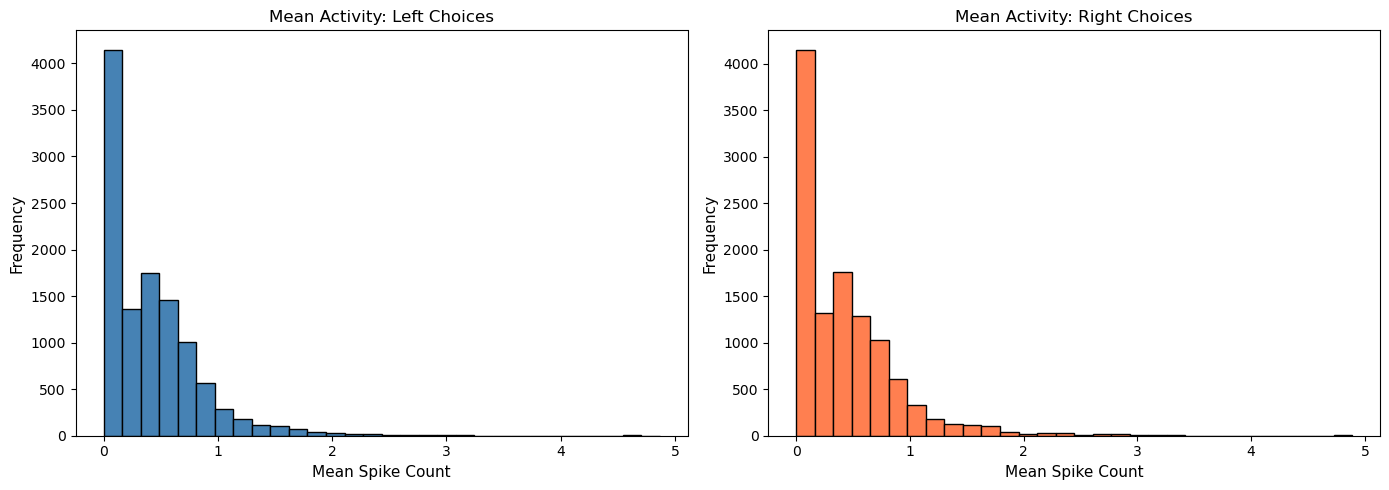

In [144]:
# Mean activity for Left vs Right choices
left_trials = df[df['label'] == 0].iloc[:, 1:]
right_trials = df[df['label'] == 1].iloc[:, 1:]

mean_left = left_trials.mean(axis=0)
mean_right = right_trials.mean(axis=0)

# Compare distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(mean_left, bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Mean Activity: Left Choices', fontsize=12)
axes[0].set_xlabel('Mean Spike Count', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)

axes[1].hist(mean_right, bins=30, color='coral', edgecolor='black')
axes[1].set_title('Mean Activity: Right Choices', fontsize=12)
axes[1].set_xlabel('Mean Spike Count', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)

plt.tight_layout()
plt.show()

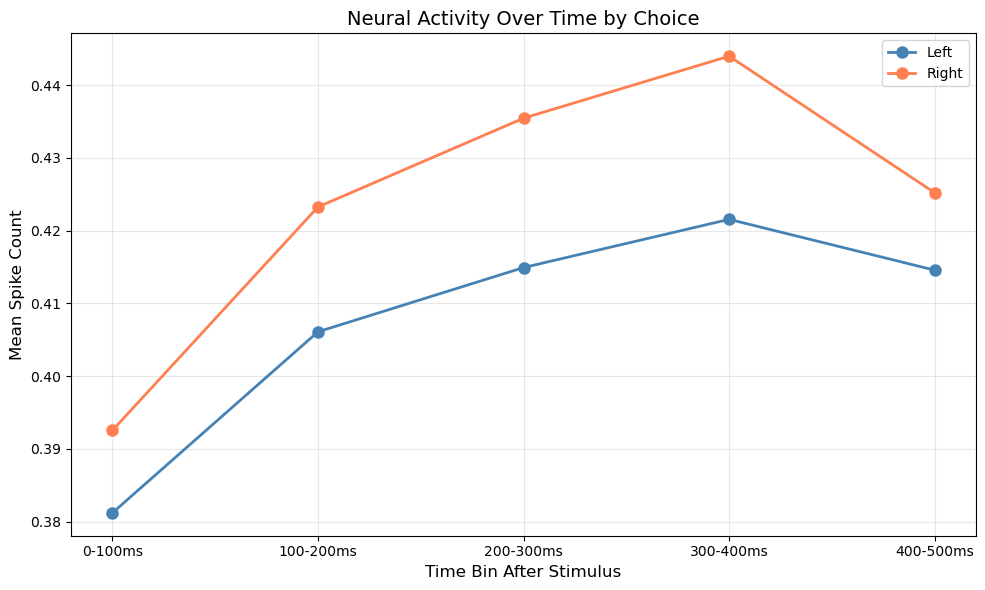

In [146]:
# Extract average activity per time bin
time_bins = range(5)
bin_activity = {'time_bin': [], 'left': [], 'right': []}

for i in range(5):
    # Get columns for this time bin
    bin_cols = [col for col in df.columns if f'_bin_{i}' in col]
    
    bin_activity['time_bin'].append(i)
    bin_activity['left'].append(left_trials[bin_cols].values.mean())
    bin_activity['right'].append(right_trials[bin_cols].values.mean())

bin_df = pd.DataFrame(bin_activity)

# Plot temporal dynamics
plt.figure(figsize=(10, 6))
plt.plot(bin_df['time_bin'], bin_df['left'], 
         marker='o', linewidth=2, markersize=8, 
         label='Left', color='steelblue')
plt.plot(bin_df['time_bin'], bin_df['right'], 
         marker='o', linewidth=2, markersize=8, 
         label='Right', color='coral')
plt.xticks(range(5), ['0-100ms', '100-200ms', '200-300ms', 
                       '300-400ms', '400-500ms'])
plt.xlabel('Time Bin After Stimulus', fontsize=12)
plt.ylabel('Mean Spike Count', fontsize=12)
plt.title('Neural Activity Over Time by Choice', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

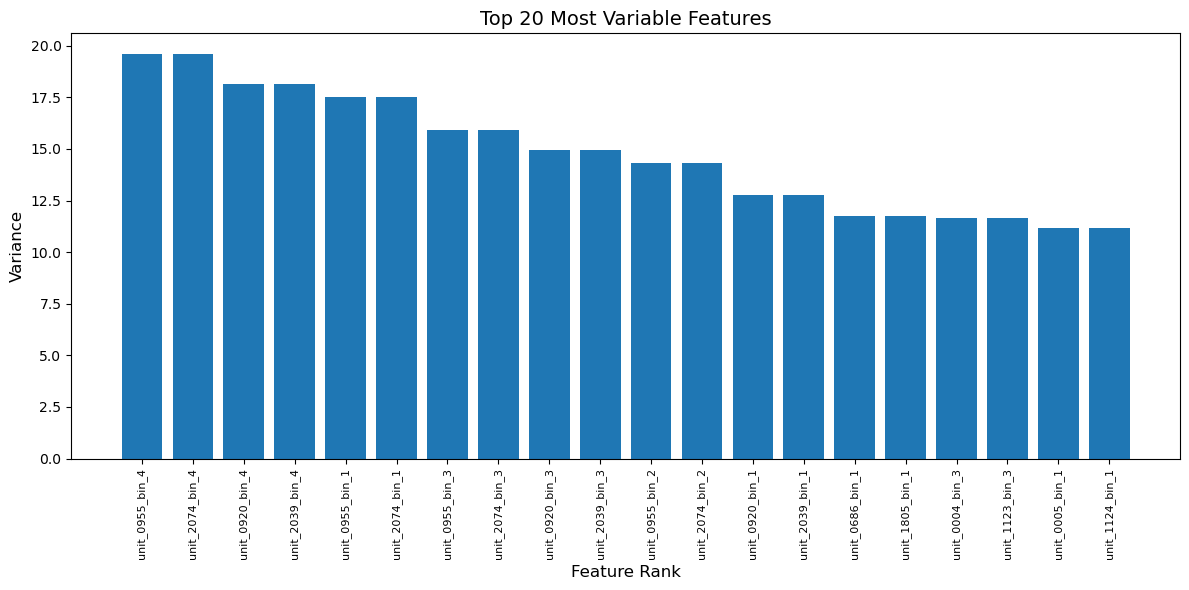


Features with variance < 0.01: 1654


In [148]:
# Which features have the most variance?
feature_vars = df.iloc[:, 1:].var()

# Top 20 most variable features
top_var_features = feature_vars.nlargest(20)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_var_features)), top_var_features.values)
plt.title('Top 20 Most Variable Features', fontsize=14)
plt.xlabel('Feature Rank', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(range(len(top_var_features)), 
           top_var_features.index, rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

# How many features have near-zero variance?
low_var = (feature_vars < 0.01).sum()
print(f"\nFeatures with variance < 0.01: {low_var}")

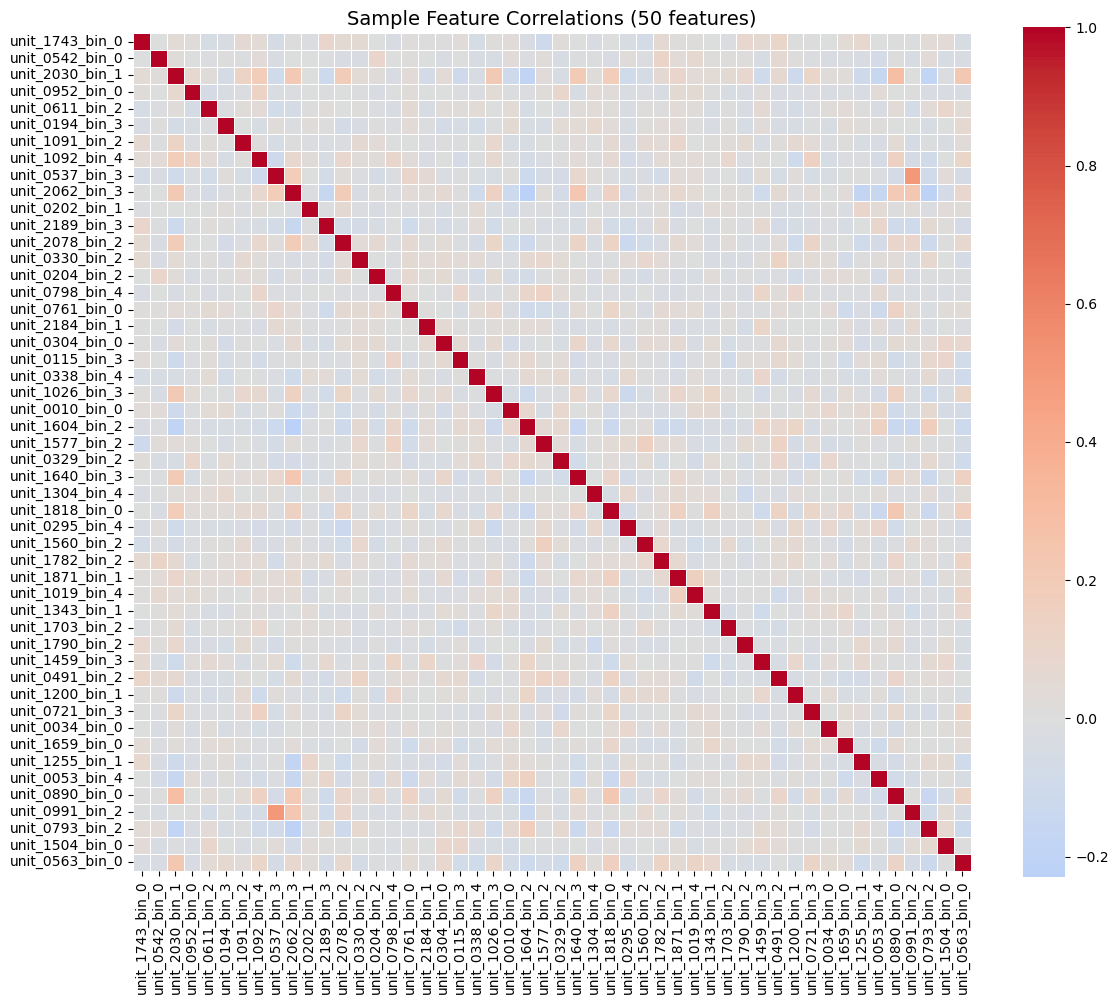

In [150]:
# Due to high dimensionality, sample subset of features
np.random.seed(123)
sample_features = np.random.choice(df.columns[1:], 50, replace=False)

cor_matrix = df[sample_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Sample Feature Correlations (50 features)', fontsize=14)
plt.tight_layout()
plt.show()

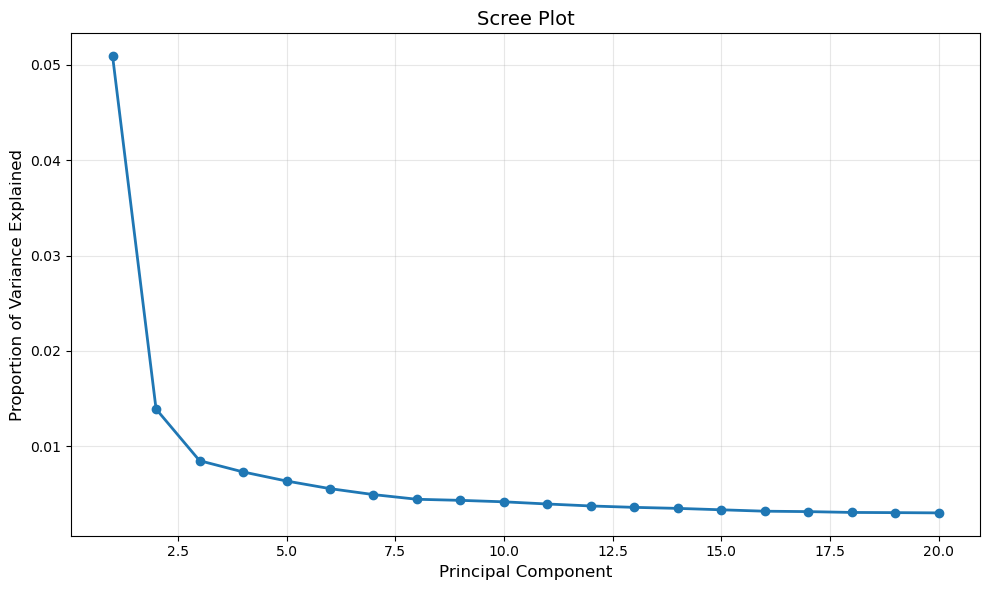

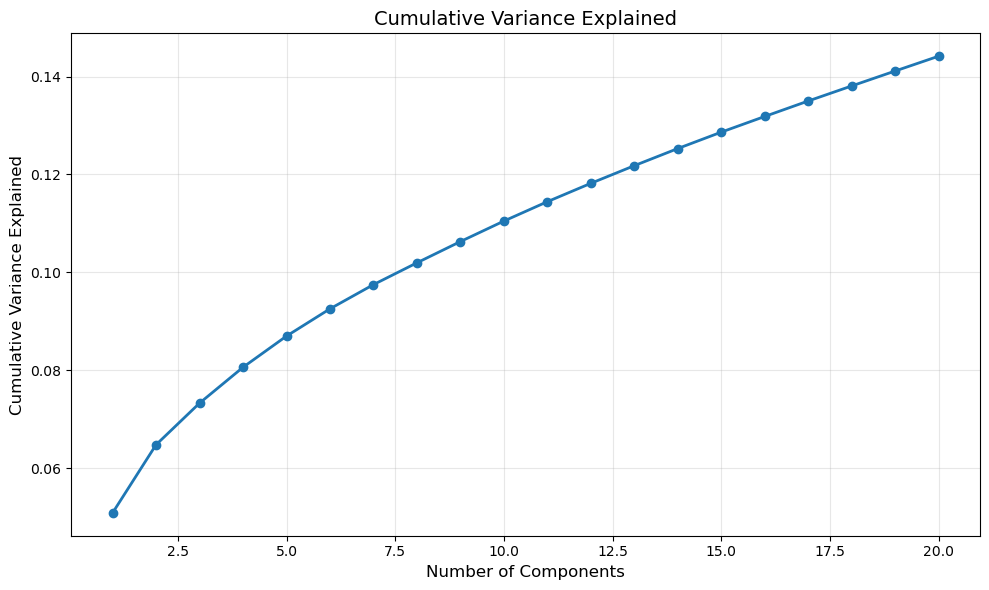

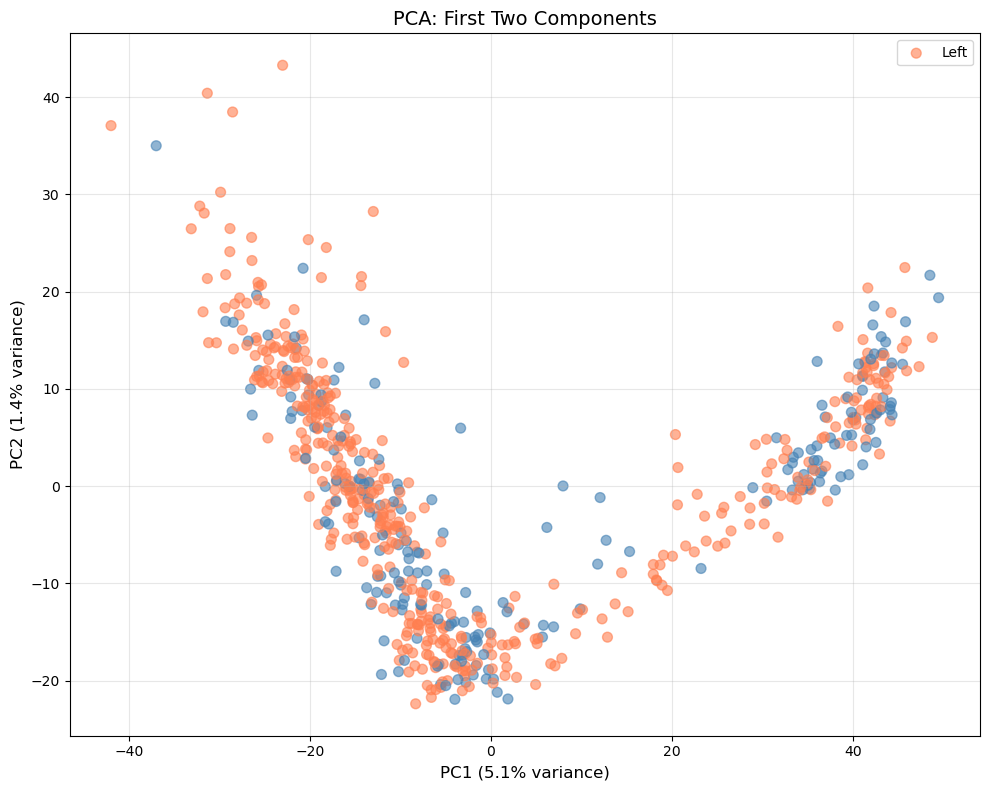

In [152]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features
X = df.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), pca.explained_variance_ratio_[:20], 
         marker='o', linewidth=2)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Proportion of Variance Explained', fontsize=12)
plt.title('Scree Plot', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), np.cumsum(pca.explained_variance_ratio_[:20]), 
         marker='o', linewidth=2)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance Explained', fontsize=12)
plt.title('Cumulative Variance Explained', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2D visualization
plt.figure(figsize=(10, 8))
colors = ['steelblue' if label == 0 else 'coral' for label in df['label']]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('PCA: First Two Components', fontsize=14)
plt.legend(['Left', 'Right'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [154]:
# Comprehensive summary
print("\n" + "="*50)
print("DATA SUMMARY")
print("="*50)
print(f"Total trials: {len(df)}")
print(f"Total features: {df.shape[1] - 1}")
print(f"Left choices: {(df['label'] == 0).sum()} ({(df['label'] == 0).mean()*100:.1f}%)")
print(f"Right choices: {(df['label'] == 1).sum()} ({(df['label'] == 1).mean()*100:.1f}%)")
print(f"Data sparsity: {np.mean(spike_counts == 0)*100:.1f}% zeros")
print(f"Mean spike count: {np.mean(spike_counts):.2f}")
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]*100:.1f}%")
print(f"Variance explained by PC1-PC2: {sum(pca.explained_variance_ratio_[:2])*100:.1f}%")
print("="*50)


DATA SUMMARY
Total trials: 683
Total features: 11190
Left choices: 208 (30.5%)
Right choices: 475 (69.5%)
Data sparsity: 74.0% zeros
Mean spike count: 0.42
Variance explained by PC1: 5.1%
Variance explained by PC1-PC2: 6.5%
